<div style="text-align: center;font-weight:bold; font-size:300%; LINE-HEIGHT:125%">
  
</div>
<div style="text-align: center;font-weight:bold; font-size:200%; LINE-HEIGHT:125%"> 
        Laboratory #3<br>
        ECE 614 Spring 2020<br> 
        Auto-encoders for Compression and Denoising<br>
</div>
<div style="text-align: center; font-size:100%"> 
        <br><b>Objective:</b> To understand and implement an Auto-encoder model of MNIST digits for data compression and denoising
</div>

## Tasks
1. In the Model Setup section, build a model with Keras Dense layers that matches the architecture shown in the figure. Train this model for 10 epochs with a batch size of 128. Use the non-noisy data for training and testing.
2. Visualize input, and model output images for 9 samples from the test dataset. Visualize encoding weights (W1) and decoding weights (W2).
3. Add l1 (L1) activity regularizer to encoding layer (first layer in this case). This is done by adding the following argument to the layer "activity_regularizer=l1(1e-5)". This should increase the sparsity of encoded images by penalizing large outputs (activity) from this layer. Also add L2 "kernel_regularizer=l2(1e-4)". This will penalize against large magnitude weights. Retrain the network. Visualize encoding (W1) and decoding weights (W2). Comment on accuracies compared to Task 1.
4. Change the <b>input</b> training and test data to the noisy datasets generated in the Data Loading section, <b>keep target output data as non-noisy data</b>. Train the network for 50 epochs. Visualize ground truth images, noisy input, and model output <b>evaluated on noisy input</b>  for 9 samples. How do the model outputs compare to the noisy inputs?
5. Increase the depth of the auto-encoder. Add two more Dense layers to the network with 64 and 128 neurons respectively, both using 'relu' activation function. Remove any regularizers. Train this new architecture on the noisy data. How does the output compare to that in Task 4? What about the compression?

## Imports
This lab will use the numpy for general and matrix mathematical functions, matplotlib for visualization, and  Keras for AI algorithms.

In [14]:
%tensorflow_version 1.14

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from keras.datasets import mnist
from keras.layers.core import Dense
from keras.layers import Input
from keras.models import Sequential, Model
from keras.regularizers import l1, l2
from keras import optimizers

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


## Data Loading and Reshaping

Keras provides the MNIST dataset and other commonly used datasets. More info on these can be found here: https://keras.io/datasets/ or http://yann.lecun.com/exdb/mnist/ or in previous labs.

Keras models expect inputs to be tensors, so the final form of the input data is an M x N array (as in the previous labs), where M is the number of samples, and N is the vector size for each sample, here N=784. Information on the function used to perform this change can be found here: https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html#numpy.reshape

The target data for AE training is the same as the input data, therefore the label values of each digit are discarded.

Another dataset is made with random noise added to it.

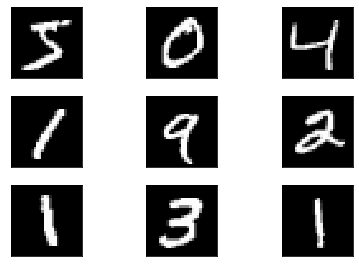

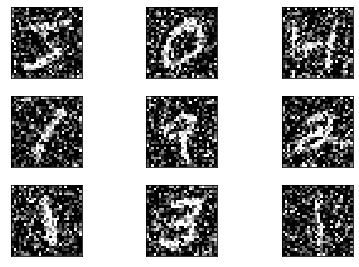

In [15]:
(x_train, __), (x_test, __) = mnist.load_data()

fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.xticks([])
    plt.yticks([])
    
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255
x_test = x_test/255

x_train_noisy = x_train + 0.5 * np.random.normal(loc=0, scale = 1., size=x_train.shape)
x_test_noisy = x_test + 0.5 * np.random.normal(loc=0, scale = 1., size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(np.reshape(x_train_noisy[i],(28,28)), cmap='gray', interpolation='none')
    plt.xticks([])
    plt.yticks([])
plt.show()

## Model Setup
![basic_autoencoder.png](attachment:basic_autoencoder.png)
<div style="text-align: center;">
            Visualization of Auto-encoder Network Architecture
</div>


Build a Sequential model using Dense layers following the architecture shown in the AE figure. No metrics are required. At the minimum, the input data is represented as a 32 value vector, after the data has been compressed from its original form (assume datatypes of 'float32')?

For this lab, the state of the art Adam optimizer will be used. The original research paper defining this optimization method can be found here: https://arxiv.org/abs/1412.6980v8 .
A loss function used here is the binary crossentropy. It is usually used for binary classification tasks with just two binary values, but it works well for optimizing models with values between 0 and 1, and AE inputs and outputs as well as target values are in this range.

$$BCE = -\sum_{i}^C t_i\ln{s_i}+ (1-t_i)\ln(1-s_i)  $$

For the basic autoencoder case $t_i$ has the same value as the input vector (reshaped images) as we are training for I/O sample data pairs being identical.

In [16]:
model = Sequential()

### Students to build model here as seen in above figure ###
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               101136    
Total params: 136,688
Trainable params: 136,688
Non-trainable params: 0
_________________________________________________________________


## Model Training
The input and target output data for a standard auto-encoder is the same.

In [17]:
training_samples = 60000
testing_samples  = 10000

batch_size = 128
epochs     = 50

'''
history = model.fit(x_train[:training_samples],
                    x_train[:training_samples],
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=1,
                    validation_data=(x_test[:testing_samples],x_test[:testing_samples]))
'''
history = model.fit(x_train_noisy[:training_samples],
                    x_train_noisy[:training_samples],
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=1,
                    validation_data=(x_test[:testing_samples],x_test[:testing_samples]))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.5506 - acc: 0.4444 - val_loss: 0.4302 - val_acc: 0.7779
Epoch 2/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.5292 - acc: 0.4624 - val_loss: 0.3762 - val_acc: 0.7914
Epoch 3/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.5254 - acc: 0.4652 - val_loss: 0.3214 - val_acc: 0.8012
Epoch 4/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.5236 - acc: 0.4664 - val_loss: 0.2693 - val_acc: 0.8073
Epoch 5/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.5226 - acc: 0.4670 - val_loss: 0.2515 - val_acc: 0.8082
Epoch 6/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.5220 - acc: 0.4675 - val_loss: 0.2596 - val_acc: 0.8074
Epoch 7/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.5215 - acc: 0.4678 - val_loss: 0.2623 - val_acc

## Visualization

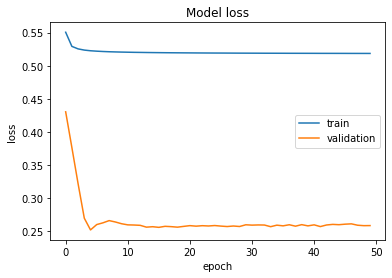

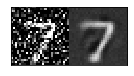

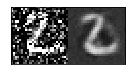

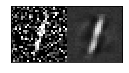

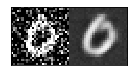

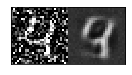

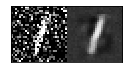

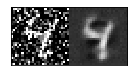

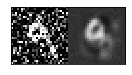

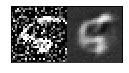

In [18]:
%matplotlib inline

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('loss'); plt.xlabel('epoch')
plt.legend(('train','validation'))

fig = plt.figure()

#### For the denoising autoencoder, visualize original, noisy, and denoised images ####
for i in range(9):
    #print(x_test[i,:].shape)  
    pred = model.predict(x_test[i,:].reshape(1,784))
    #print(pred.shape)
    in1=x_test_noisy[i,:].reshape(1,784)
    #in1=x_test[i,:].reshape(1,784)
    pred3=in1.reshape(28,28)
    pred1=pred.reshape(28,28)

#for i in range(9):
    ground_truth = np.reshape(x_test_noisy[i],(28,28))
    prediction = np.reshape(model.predict(x_test_noisy[i:i+1]),(28,28))

    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(np.hstack((ground_truth, prediction)), cmap='gray', interpolation='none')
#    plt.subplot(3,3,i+1)
#    plt.tight_layout()
#    plt.imshow(np.hstack((pred1,pred3)), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

## Weight Visualization

In [19]:
weights = model.get_weights()

### hint
print(weights[0].shape)
print(weights[2].shape)

#w1 = model.layers[0].get_weights()[0]
w1=weights[0]
#w2 = model.layers[1].get_weights()[0]
w2=weights[2]

w1 = np.reshape(w1, [28,28,32])
w2 = np.reshape(w2, [32,28,28])

#w2=np.reshape(w1,[28,28,32])
weight_img1 =w1[:,:,i]
weight_img2 =w2[i,:,:]

fig = plt.figure(figsize=[16,9.6])
for i in range(32):
    
    ### Students to make visualizations here ###
    weight_img1 = np.zeros((28,28))
    weight_img1 = w1[:,:,i]
    plt.subplot(4, 8, i+1)
    plt.imshow(weight_img1, cmap='gray', interpolation='none')
    plt.axis('off')
    plt.suptitle("Encoding Weights (W1)")


fig = plt.figure(figsize=[16,9.6])
for i in range(32):
    
    ### Students to make visualizations here ###
    weight_img2 = np.zeros((28,28))
    weight_img2 = w2[i,:,:]
    plt.subplot(4, 8, i+1)
    plt.imshow(weight_img2, cmap='gray', interpolation='none')
    plt.axis('off')  
    plt.suptitle("Decoding Weights (W2)")


(784, 32)
(32, 64)


ValueError: ignored

## Activity Visualization
Set up new model using existing model. This model will output the encoded images.

In [0]:
encoder = Model(inputs=model.input,
                outputs=model.layers[0].output)

In [0]:
samples = 10
encodings = encoder.predict(x_test[:samples])
plt.figure(figsize=(20,20))
plt.imshow(encodings, interpolation='none')
plt.show()